In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
pip install pandoc

Note: you may need to restart the kernel to use updated packages.


In [18]:
df = pd.read_csv(r'C:\Users\mattd\Desktop\Excel Files\Files for Excel\Healthcare_Associated_Infections-Hospital.csv')

df.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Score,Footnote,Start Date,End Date
0,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_1_DOPC,Central Line Associated Bloodstream Infection:...,Not Available,732.000,3.0,2022-10-01,2023-09-30
1,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_1_ELIGCASES,Central Line Associated Bloodstream Infection ...,Not Available,0.605,3.0,2022-10-01,2023-09-30
2,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,Not Available,0.000,3.0,2022-10-01,2023-09-30
3,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_2_DOPC,Catheter Associated Urinary Tract Infections (...,Not Available,738.000,3.0,2022-10-01,2023-09-30
4,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_2_ELIGCASES,Catheter Associated Urinary Tract Infections (...,Not Available,0.432,3.0,2022-10-01,2023-09-30


### Shape and info

In [6]:
df.shape
print(f"{df.shape} Columns and Rows")

(97201, 15) Columns and Rows


In [7]:
# use describe to get geneal idea of range of field values
df.describe()

,ZIP Code,Score,Footnote
count,97201.000000,97201.000000,2152.000000
mean,52250.786905,3611.339564,10.051580
std,27864.192675,20491.675151,11.252713
min,612.000000,0.000000,3.000000
25%,30281.000000,0.243000,3.000000
50%,50421.000000,1.316000,3.000000
75%,76210.000000,13.000000,28.000000
max,99901.000000,903601.000000,28.000000


## Data Dictionary

State: The state where the data was collected.

Measure ID: Unique identifier for the type of infection measure.

Measure Name: Describes the type of hospital-acquired infection being measured.

Score: Represents the infection rate or related metric.

Footnote: Contains additional notes, though most entries are missing (75 out of 1,008 entries are non-null).

Start Date and End Date: The time frame during which the data was collected.

## Data Cleaning

In [8]:
# Convert 'Start Date' and 'End Date' to datetime format for easier analysis
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')

# Convert 'Score' to numeric, coerce errors to handle non-numeric values if any
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

# Check for any missing or irregular data after conversions
missing_df_summary = df.isnull().sum()

# Summarize Score by Measure Name and State over time (mean Score)
time_series_summary = df.groupby(['Start Date', 'Measure Name', 'State'])['Score'].mean().reset_index()

# Display the cleaned data's missing data summary and a sample of the time series summary
missing_df_summary, time_series_summary.head()


(Facility ID                 0
 Facility Name               0
 Address                     0
 City/Town                   0
 State                       0
 ZIP Code                    0
 County/Parish               0
 Telephone Number            0
 Measure ID                  0
 Measure Name                0
 Compared to National        0
 Score                       0
 Footnote                95049
 Start Date                  0
 End Date                    0
 dtype: int64,
   Start Date                                       Measure Name State  \
 0 2022-10-01  Catheter Associated Urinary Tract Infections (...    AK   
 1 2022-10-01  Catheter Associated Urinary Tract Infections (...    AL   
 2 2022-10-01  Catheter Associated Urinary Tract Infections (...    AR   
 3 2022-10-01  Catheter Associated Urinary Tract Infections (...    AZ   
 4 2022-10-01  Catheter Associated Urinary Tract Infections (...    CA   
 
       Score  
 0  0.620800  
 1  0.574326  
 2  0.453741  
 3  0.397886  

### Handling Null Values

In [9]:
# Create a DataFrame with rows where 'Score' is 'NaN'
df_not_available = df[df['Score'].isna()]

# Remove these rows from the working DataFrame
df = df[df['Score'].notna()]

# Display the DataFrame with 'Not Available' values for verification
df_not_available      # Should return no values

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Score,Footnote,Start Date,End Date


### DF's not in use

In [19]:
# DataFrame with rows where 'Score' is 'NaN'
df_not_available

# DF grouped by Facility Name Measure name and Score
grouped_df = df.groupby(['Facility Name', 'Measure Name'])['Score'].mean().reset_index()

# Further filtered version of DF Grouped Selecting only those from Measure Names where they end with "Observed Cases"
observed_cases_df = grouped_df[grouped_df['Measure Name'].str.endswith('Observed Cases')]

# Check for any missing or irregular data after conversions
missing_df_summary = df.isnull().sum()

# Summarize Score by Measure Name and State over time (mean Score)
time_series_summary = df.groupby(['Start Date', 'Measure Name', 'State'])['Score'].mean().reset_index()

# Display the cleaned data's missing data summary and a sample of the time series summary
missing_df_summary, time_series_summary

(Facility ID                 0
 Facility Name               0
 Address                     0
 City/Town                   0
 State                       0
 ZIP Code                    0
 County/Parish               0
 Telephone Number            0
 Measure ID                  0
 Measure Name                0
 Compared to National        0
 Score                       0
 Footnote                95049
 Start Date                  0
 End Date                    0
 dtype: int64,
       Start Date                                       Measure Name State  \
 0     2022-10-01  Catheter Associated Urinary Tract Infections (...    AK   
 1     2022-10-01  Catheter Associated Urinary Tract Infections (...    AL   
 2     2022-10-01  Catheter Associated Urinary Tract Infections (...    AR   
 3     2022-10-01  Catheter Associated Urinary Tract Infections (...    AZ   
 4     2022-10-01  Catheter Associated Urinary Tract Infections (...    CA   
 ...          ...                                   

In [11]:
# Recheck shape and Dtypes
df.shape

print(f"{df.shape} Rows and Columns")

(97201, 15) Rows and Columns


STOP

### Save To CSV File

In [12]:
# Specify the file path where you want to save the CSV file
file_path = r'C:\Users\mattd\Desktop\Excel Files\Files for Excel\Healthcare_Associated_Infections-Hospital.csv'

# Save the DataFrame to the specified CSV file
df.to_csv(file_path, index=False)


## Grouping

### Facility Name and Measure Name by Average Score

In [14]:
# Convert 'Score' column to numeric, coercing non-numeric values to NaN
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

# Drop rows where 'Score' is NaN
df = df.dropna(subset=['Score'])   # SUBSET ENSURES ONLY SCORES THAT ARE NOT NaN ARE INCLUDED
    
# Group by 'Facility Name' and 'Measure ID' and calculate the mean score
grouped_df = df.groupby(['Facility Name', 'Measure Name'])['Score'].mean().reset_index()


# Filter grouped_df to include only rows where 'Measure Name' ends with 'Observed Cases'
observed_cases_df = grouped_df[grouped_df['Measure Name'].str.endswith('Observed Cases')]

# Display the filtered DataFrame
observed_cases_df.head()



,Facility Name,Measure Name,Score
1,60th Medical Group (Travis AFB),Catheter Associated Urinary Tract Infections (...,0.0
3,60th Medical Group (Travis AFB),Central Line Associated Bloodstream Infection ...,0.0
8,60th Medical Group (Travis AFB),Clostridium Difficile (C.Diff): Observed Cases,6.0
13,673rd Medical Group (Joint Base Elmendorf-Rich...,Catheter Associated Urinary Tract Infections (...,0.0
15,673rd Medical Group (Joint Base Elmendorf-Rich...,Central Line Associated Bloodstream Infection ...,0.0


In [15]:
observed_cases_df.describe()

,Score
count,21123.000000
mean,3.715193
std,10.147671
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,264.000000


## Creating Individual DF's for Measure ID's that only have the acutal Scores (Observed and Predicted)

#### Observed DF (like observed cases but includes all columns)

In [16]:
# Create a DataFrame with rows where 'Measure Name' ends with 'Observed Cases'
observed_df = df[df['Measure Name'].str.endswith('Observed Cases')]

# Display the filtered DataFrames
print("Observed Cases DataFrame:")
observed_df

Observed Cases DataFrame:


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Score,Footnote,Start Date,End Date
2,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,Not Available,0.0,3.0,2022-10-01,2023-09-30
5,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_2_NUMERATOR,Catheter Associated Urinary Tract Infections (...,Not Available,0.0,3.0,2022-10-01,2023-09-30
10,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_6_NUMERATOR,Clostridium Difficile (C.Diff): Observed Cases,Worse than the National Benchmark,6.0,3.0,2022-10-01,2023-09-30
14,02013F,673rd Medical Group (Joint Base Elmendorf-Rich...,673 MDG 5955 Zeamer Ave,JBER,AK,99506,ANCHORAGE,(907) 384-1110,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,Not Available,0.0,NaN,2022-10-01,2023-09-30
17,02013F,673rd Medical Group (Joint Base Elmendorf-Rich...,673 MDG 5955 Zeamer Ave,JBER,AK,99506,ANCHORAGE,(907) 384-1110,HAI_2_NUMERATOR,Catheter Associated Urinary Tract Infections (...,Not Available,0.0,NaN,2022-10-01,2023-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97187,050228,ZUCKERBERG SAN FRANCISCO GENERAL HOSP & TRAUMA...,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,SAN FRANCISCO,(415) 206-8000,HAI_6_NUMERATOR,Clostridium Difficile (C.Diff): Observed Cases,Better than the National Benchmark,17.0,NaN,2022-10-01,2023-09-30
97191,320060,ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,ROUTE 301 NORTH B STREET,ZUNI,NM,87327,MCKINLEY,(505) 782-4431,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,Not Available,0.0,NaN,2022-10-01,2023-09-30
97194,320060,ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,ROUTE 301 NORTH B STREET,ZUNI,NM,87327,MCKINLEY,(505) 782-4431,HAI_2_NUMERATOR,Catheter Associated Urinary Tract Infections (...,Not Available,0.0,NaN,2022-10-01,2023-09-30
97197,320060,ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,ROUTE 301 NORTH B STREET,ZUNI,NM,87327,MCKINLEY,(505) 782-4431,HAI_5_NUMERATOR,MRSA Bacteremia: Observed Cases,Not Available,0.0,NaN,2022-10-01,2023-09-30


#### Predicted DF

In [17]:
# Create a DataFrame with rows where 'Measure Name' ends with 'Predicted Cases'
predicted_df = df[df['Measure Name'].str.endswith('Predicted Cases')]


print("\nPredicted Cases DataFrame:")
predicted_df



Predicted Cases DataFrame:


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Score,Footnote,Start Date,End Date
1,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_1_ELIGCASES,Central Line Associated Bloodstream Infection ...,Not Available,0.605,3.0,2022-10-01,2023-09-30
4,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_2_ELIGCASES,Catheter Associated Urinary Tract Infections (...,Not Available,0.432,3.0,2022-10-01,2023-09-30
9,05015F,60th Medical Group (Travis AFB),101 Bodin Circle Bldg. 777,Travis AFB,CA,94535,SOLANO,(707) 423-7300,HAI_6_ELIGCASES,Clostridium Difficile (C.Diff): Predicted Cases,Worse than the National Benchmark,1.861,3.0,2022-10-01,2023-09-30
13,02013F,673rd Medical Group (Joint Base Elmendorf-Rich...,673 MDG 5955 Zeamer Ave,JBER,AK,99506,ANCHORAGE,(907) 384-1110,HAI_1_ELIGCASES,Central Line Associated Bloodstream Infection ...,Not Available,0.254,NaN,2022-10-01,2023-09-30
16,02013F,673rd Medical Group (Joint Base Elmendorf-Rich...,673 MDG 5955 Zeamer Ave,JBER,AK,99506,ANCHORAGE,(907) 384-1110,HAI_2_ELIGCASES,Catheter Associated Urinary Tract Infections (...,Not Available,0.331,NaN,2022-10-01,2023-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97186,050228,ZUCKERBERG SAN FRANCISCO GENERAL HOSP & TRAUMA...,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,SAN FRANCISCO,(415) 206-8000,HAI_6_ELIGCASES,Clostridium Difficile (C.Diff): Predicted Cases,Better than the National Benchmark,41.155,NaN,2022-10-01,2023-09-30
97190,320060,ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,ROUTE 301 NORTH B STREET,ZUNI,NM,87327,MCKINLEY,(505) 782-4431,HAI_1_ELIGCASES,Central Line Associated Bloodstream Infection ...,Not Available,0.004,NaN,2022-10-01,2023-09-30
97193,320060,ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,ROUTE 301 NORTH B STREET,ZUNI,NM,87327,MCKINLEY,(505) 782-4431,HAI_2_ELIGCASES,Catheter Associated Urinary Tract Infections (...,Not Available,0.060,NaN,2022-10-01,2023-09-30
97196,320060,ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,ROUTE 301 NORTH B STREET,ZUNI,NM,87327,MCKINLEY,(505) 782-4431,HAI_5_ELIGCASES,MRSA Bacteremia: Predicted Cases,Not Available,0.039,NaN,2022-10-01,2023-09-30


In [21]:
predicted_df.iloc[:,9]

1        Central Line Associated Bloodstream Infection ...
4        Catheter Associated Urinary Tract Infections (...
9          Clostridium Difficile (C.Diff): Predicted Cases
13       Central Line Associated Bloodstream Infection ...
16       Catheter Associated Urinary Tract Infections (...
                               ...                        
97186      Clostridium Difficile (C.Diff): Predicted Cases
97190    Central Line Associated Bloodstream Infection ...
97193    Catheter Associated Urinary Tract Infections (...
97196                     MRSA Bacteremia: Predicted Cases
97199      Clostridium Difficile (C.Diff): Predicted Cases
Name: Measure Name, Length: 21636, dtype: object

## Average Infection Rates by Infection Type For Each State

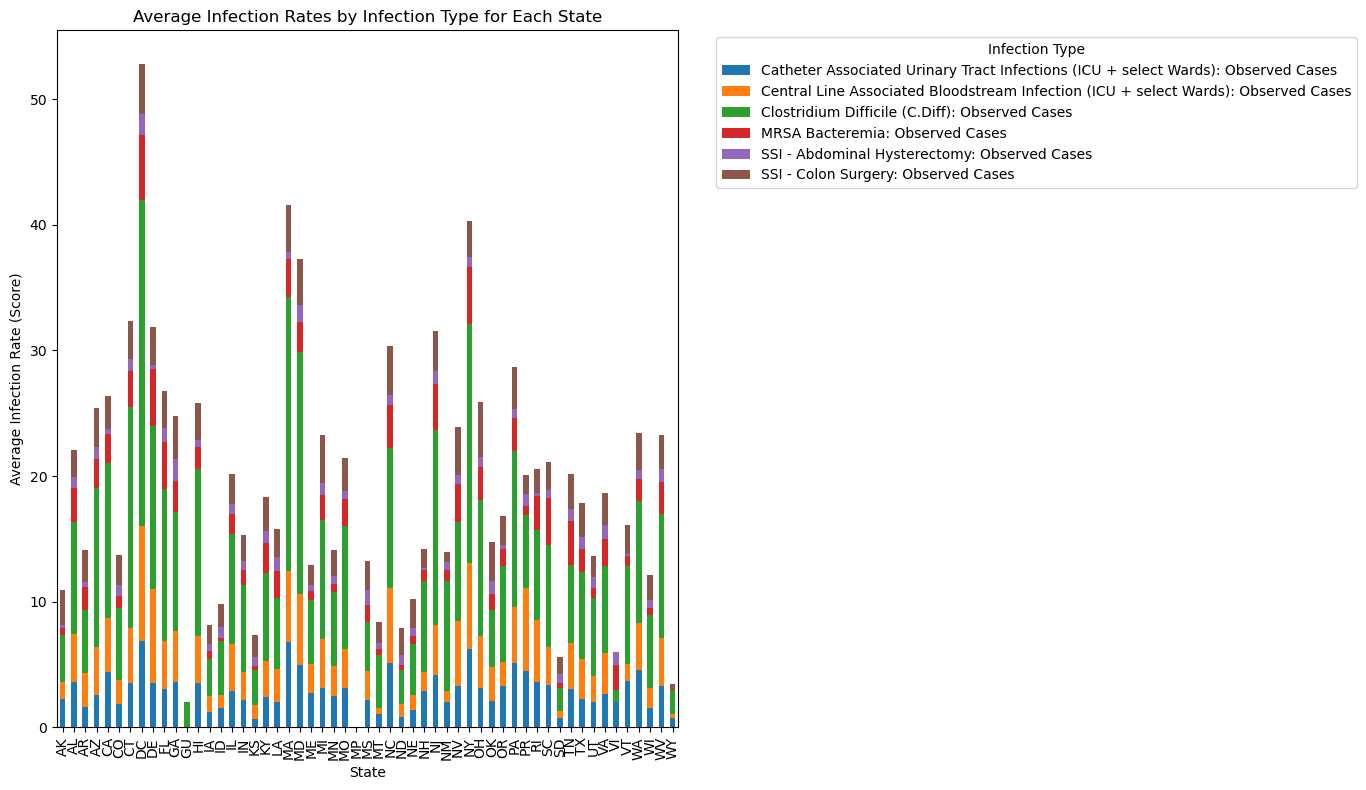

In [13]:
# Bar Chart: Compare infection rates by infection type for each state
# Group data by State and Measure Name and calculate mean Score

bar_df = observed_df.groupby(['State', 'Measure Name'])['Score'].mean().unstack()

# Plot the bar chart
bar_df.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Average Infection Rates by Infection Type for Each State')
plt.xlabel('State')
plt.ylabel('Average Infection Rate (Score)')
plt.legend(title='Infection Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Distribution of Infection Rates By Infection Type

C:\Users\mattd\AppData\Local\Temp\ipykernel_32712\2854999017.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  mpl.tight_layout()


<Figure size 1200x800 with 0 Axes>

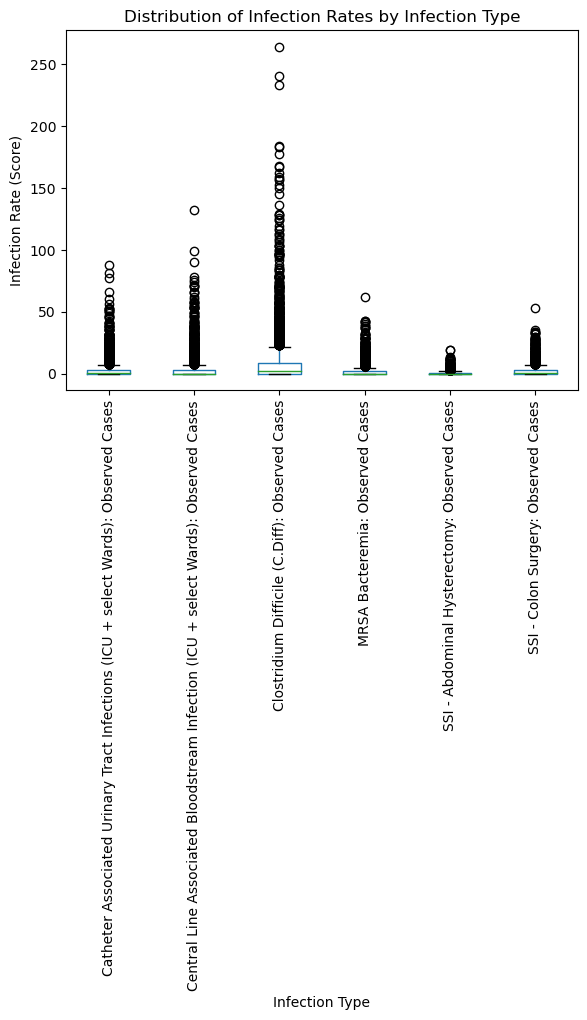

In [14]:
# Import matplotlib.pyplot under a completely new alias to avoid any conflicts
import matplotlib.pyplot as mpl

# Box Plot: Show distribution of infection rates by infection type
mpl.figure(figsize=(12, 8))
observed_df.boxplot(column='Score', by='Measure Name', grid=False)
mpl.title('Distribution of Infection Rates by Infection Type')
mpl.suptitle('')  # Remove the automatic super title
mpl.xlabel('Infection Type')
mpl.ylabel('Infection Rate (Score)')
mpl.xticks(rotation=90)
mpl.tight_layout()
mpl.show()


## Heat Map of Infection Rates by State and Infection Type

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for heatmap
heatmap_df = observed_df.pivot_table(index='State', columns='Measure Name', values='Score', aggfunc='mean')


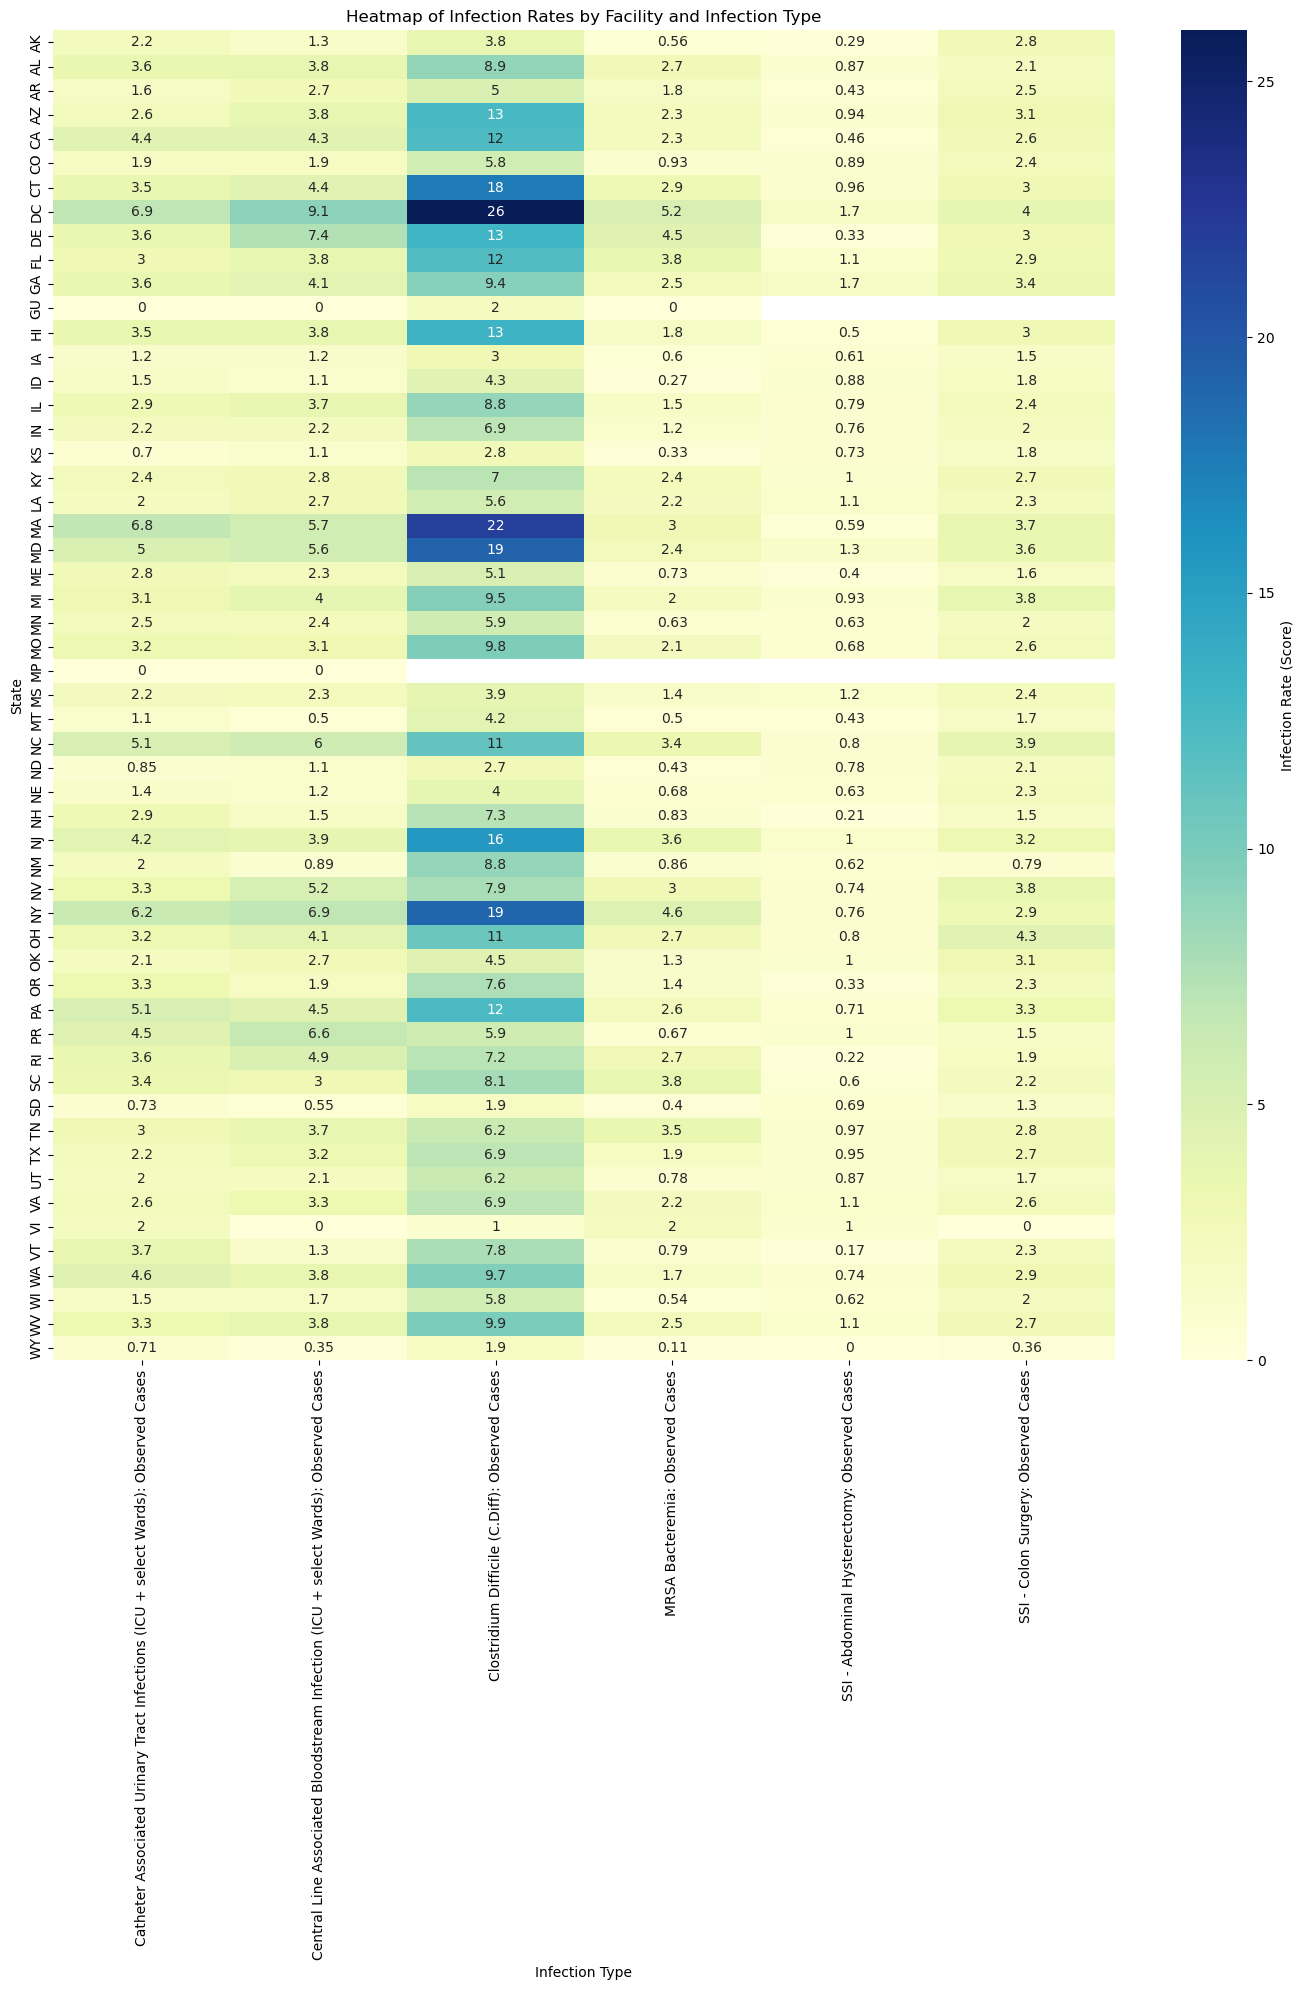

In [16]:
# Further increase the figure height for more spacing between y-axis labels
plt.figure(figsize=(14, 20))  # Further increased height to add more space for y-axis labels
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Infection Rate (Score)'})
plt.title('Heatmap of Infection Rates by Facility and Infection Type')
plt.xlabel('Infection Type')
plt.ylabel('State')
plt.xticks(rotation=90)  # Keep x-axis labels vertical
plt.yticks(fontsize=10)  # Maintain y-axis font size
plt.tight_layout()
plt.show()


# PCA 1: Facility Name By infection Score

1. Group the Data by Facility Name and summarize it (mean score) or work with the OG scores if thats most relevant
2. Standardize data
3. Apply PCA to infection scores to reduce to the facilities who contribute most to the variance 

In [17]:
# Import necessary Packages

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


### Standardize Data and Apply PCA

In [18]:
# Use Observed DF as it only includes those values in Measure Name that matter


# Group by 'Facility Name' and calculate mean infection score
facility_scores = observed_df.groupby('Facility Name')['Score'].mean().reset_index()


# Standardize the scores
scaler = StandardScaler()
scores_standardized = scaler.fit_transform(facility_scores[['Score']])

# Apply PCA
pca = PCA(n_components=1)  # 1 component to capture the most variance
pca_scores = pca.fit_transform(scores_standardized)

# Add PCA results back to the DataFrame
facility_scores['PCA Score'] = pca_scores

# Filter based on PCA score to identify facilities with highest variance
# (You might set a threshold based on percentiles or just view the top n results)
top_facilities = facility_scores[facility_scores['PCA Score'] > 0.5]  # Threshold of 0.5
print(top_facilities)


                                          Facility Name      Score  PCA Score
8                          ABBOTT NORTHWESTERN HOSPITAL  13.166667   1.548433
9                            ABINGTON MEMORIAL HOSPITAL  16.666667   2.092504
32                           ADVENTHEALTH DAYTONA BEACH   7.166667   0.615739
43                                 ADVENTHEALTH ORLANDO  42.500000   6.108271
48                                   ADVENTHEALTH TAMPA   8.500000   0.823004
...                                                 ...        ...        ...
4159                              WINTER HAVEN HOSPITAL   6.500000   0.512106
4179              Walter Reed National Military Med Cen   7.666667   0.693463
4185                            YALE-NEW HAVEN HOSPITAL  50.500000   7.351863
4192                       YUMA REGIONAL MEDICAL CENTER   8.333333   0.797096
4193  ZUCKERBERG SAN FRANCISCO GENERAL HOSP & TRAUMA...   9.500000   0.978453

[572 rows x 3 columns]


### Heatmap Visualizing PCA Dataframe

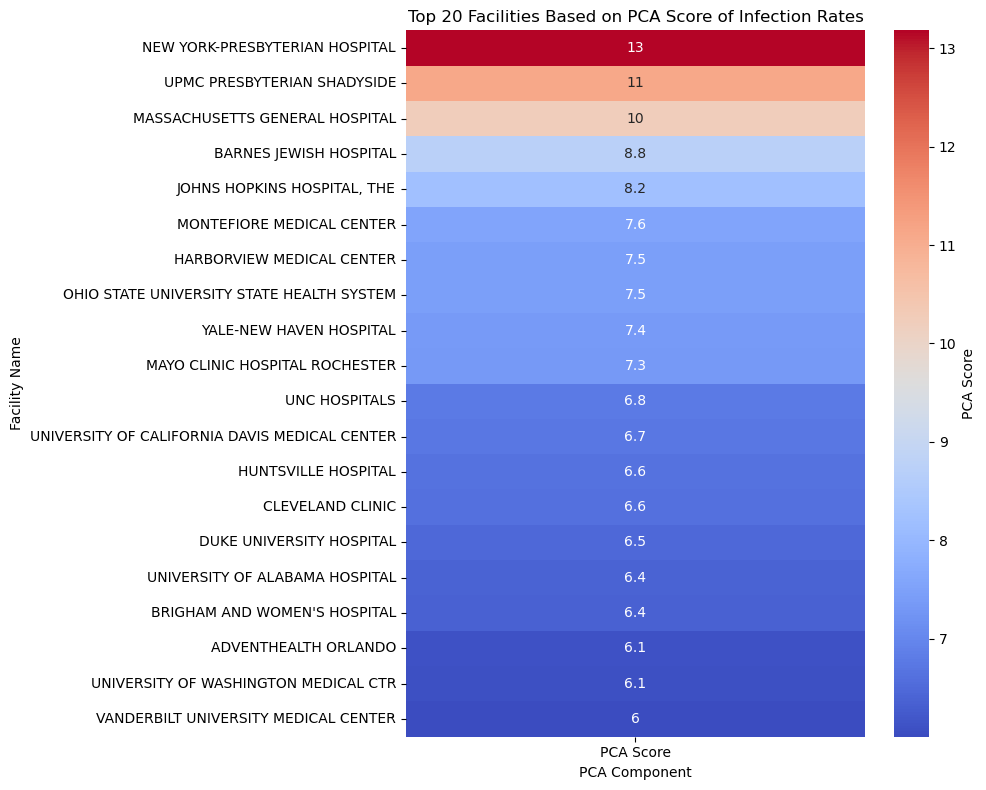

In [19]:
# Sort by PCA Score and select the top 20 facilities for readability
top_20_facilities = facility_scores.nlargest(20, 'PCA Score')

# Plot the heatmap for the top 20 facilities
plt.figure(figsize=(10, 8))
sns.heatmap(
    top_20_facilities[['PCA Score']].set_index(top_20_facilities['Facility Name']),  # Set index to Facility Name for y-axis
    annot=True,
    cmap='coolwarm',
    cbar_kws={'label': 'PCA Score'}
)
plt.title('Top 20 Facilities Based on PCA Score of Infection Rates')
plt.xlabel('PCA Component')
plt.ylabel('Facility Name')
plt.tight_layout()
plt.show()


# PCA 2: State by Infection Score

In [20]:
# Import necessary Packages

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


### Standardize Data and Run PCA

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create df from observed_df (contains only the parts of the scores we want) and select State and Score
state_df = observed_df.groupby('State')['Score'].mean().reset_index()

# Standardize the scores
scaler = StandardScaler()
scores_standardized = scaler.fit_transform(state_df[['Score']])

# Apply PCA
pca = PCA(n_components=1)  # 1 component to capture the most variance
pca_scores = pca.fit_transform(scores_standardized)

# Add PCA results back to the DataFrame
state_df['PCA Score'] = pca_scores

# Filter based on PCA score to identify states with highest variance
# Using top n results or setting a threshold
top_states = state_df[state_df['PCA Score'] > 0.5]  # Adjust the threshold as needed

# Display the top states
top_states


,State,Score,PCA Score
3,AZ,4.442308,0.613554
4,CA,4.582770,0.693443
6,CT,5.490196,1.209547
7,DC,8.763158,3.071063
8,DE,5.315789,1.110352
9,FL,4.552372,0.676154
10,GA,4.355243,0.564035
12,HI,4.558442,0.679606
20,MA,7.256250,2.214000
21,MD,6.387352,1.719809


### Heatmap of State by PCA Infection Score

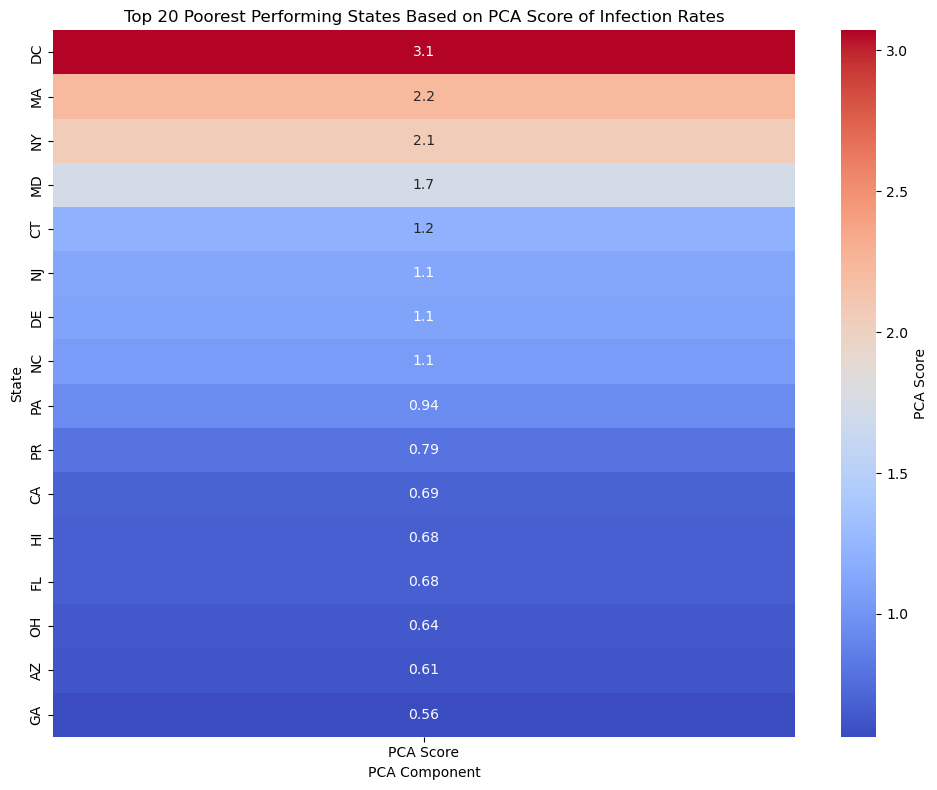

In [22]:
# Sort the top_states DataFrame by PCA Score in descending order
top_states = top_states.sort_values(by='PCA Score', ascending=False)

# Limit to the top 20 states with the highest PCA scores
top_20_states = top_states.head(20)

# Plot the heatmap for the top 20 states
plt.figure(figsize=(10, 8))
sns.heatmap(
    top_20_states[['PCA Score']].set_index(top_20_states['State']),  # Set index to State for y-axis
    annot=True,
    cmap='coolwarm',
    cbar_kws={'label': 'PCA Score'}
)
plt.title('Top 20 Poorest Performing States Based on PCA Score of Infection Rates')
plt.xlabel('PCA Component')
plt.ylabel('State')
plt.tight_layout()
plt.show()


### Basically these 2 PCA's show us is that...
1. on a facility level, New York Presbyterian hospital is the poorest performing with the highest Infection Rates
2. At a State level, Washington DC is the poorest performing State in the US when it comes to infection Scores

#### Analysis of DC Facilities

In [23]:
# Filter to get data from DC only 
dc_facilities = observed_df[observed_df['State'] == 'DC']

# filter to get Data from all other States
other_states_facilities = observed_df[observed_df['State'] != 'DC']


# Display first few rows for each DataFrame to check
print("DC Facilities Data:")
dc_facilities.head()


DC Facilities Data:


,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Measure ID,Measure Name,Compared to National,Score,Footnote,Start Date,End Date
28002,090001,GEORGE WASHINGTON UNIV HOSPITAL,900 23RD ST NW,WASHINGTON,DC,20037,THE DISTRICT,(202) 716-4605,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,10.0,NaN,2022-10-01,2023-09-30
28008,090001,GEORGE WASHINGTON UNIV HOSPITAL,900 23RD ST NW,WASHINGTON,DC,20037,THE DISTRICT,(202) 716-4605,HAI_2_NUMERATOR,Catheter Associated Urinary Tract Infections (...,No Different than National Benchmark,16.0,NaN,2022-10-01,2023-09-30
28014,090001,GEORGE WASHINGTON UNIV HOSPITAL,900 23RD ST NW,WASHINGTON,DC,20037,THE DISTRICT,(202) 716-4605,HAI_3_NUMERATOR,SSI - Colon Surgery: Observed Cases,No Different than National Benchmark,4.0,NaN,2022-10-01,2023-09-30
28018,090001,GEORGE WASHINGTON UNIV HOSPITAL,900 23RD ST NW,WASHINGTON,DC,20037,THE DISTRICT,(202) 716-4605,HAI_4_NUMERATOR,SSI - Abdominal Hysterectomy: Observed Cases,Not Available,0.0,NaN,2022-10-01,2023-09-30
28023,090001,GEORGE WASHINGTON UNIV HOSPITAL,900 23RD ST NW,WASHINGTON,DC,20037,THE DISTRICT,(202) 716-4605,HAI_5_NUMERATOR,MRSA Bacteremia: Observed Cases,Better than the National Benchmark,3.0,NaN,2022-10-01,2023-09-30


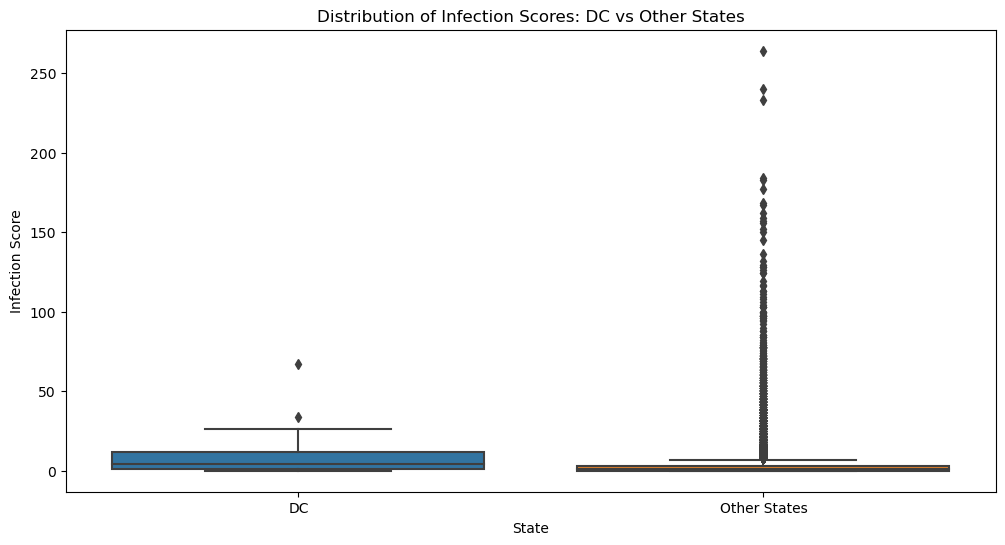

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create copies of the data to avoid modifying the original DataFrame
dc_facilities_copy = dc_facilities.copy()
other_states_facilities_copy = other_states_facilities.copy()

# Set the 'State' column explicitly on the copies
dc_facilities_copy.loc[:, 'State'] = 'DC'
other_states_facilities_copy.loc[:, 'State'] = 'Other States'

# Combine the data for plotting
combined_df = pd.concat([dc_facilities_copy, other_states_facilities_copy])

# Create a box plot to show distribution of infection scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='State', y='Score')
plt.title('Distribution of Infection Scores: DC vs Other States')
plt.xlabel('State')
plt.ylabel('Infection Score')
plt.show()



### Interpretation

1. The higher scores and greater number of outliers in other states suggest that while DC may have high infection rates on average, other states have facilities with even more extreme infection scores. ( This can be seen in DC's box in the chart below)
   
2. The box plot helps validate that DC’s scores, while high, are not as extreme as some facilities in other states. This could explain why DC showed up as a high scorer in your PCA analysis: the scores are relatively high but not necessarily extreme outliers compared to other states.

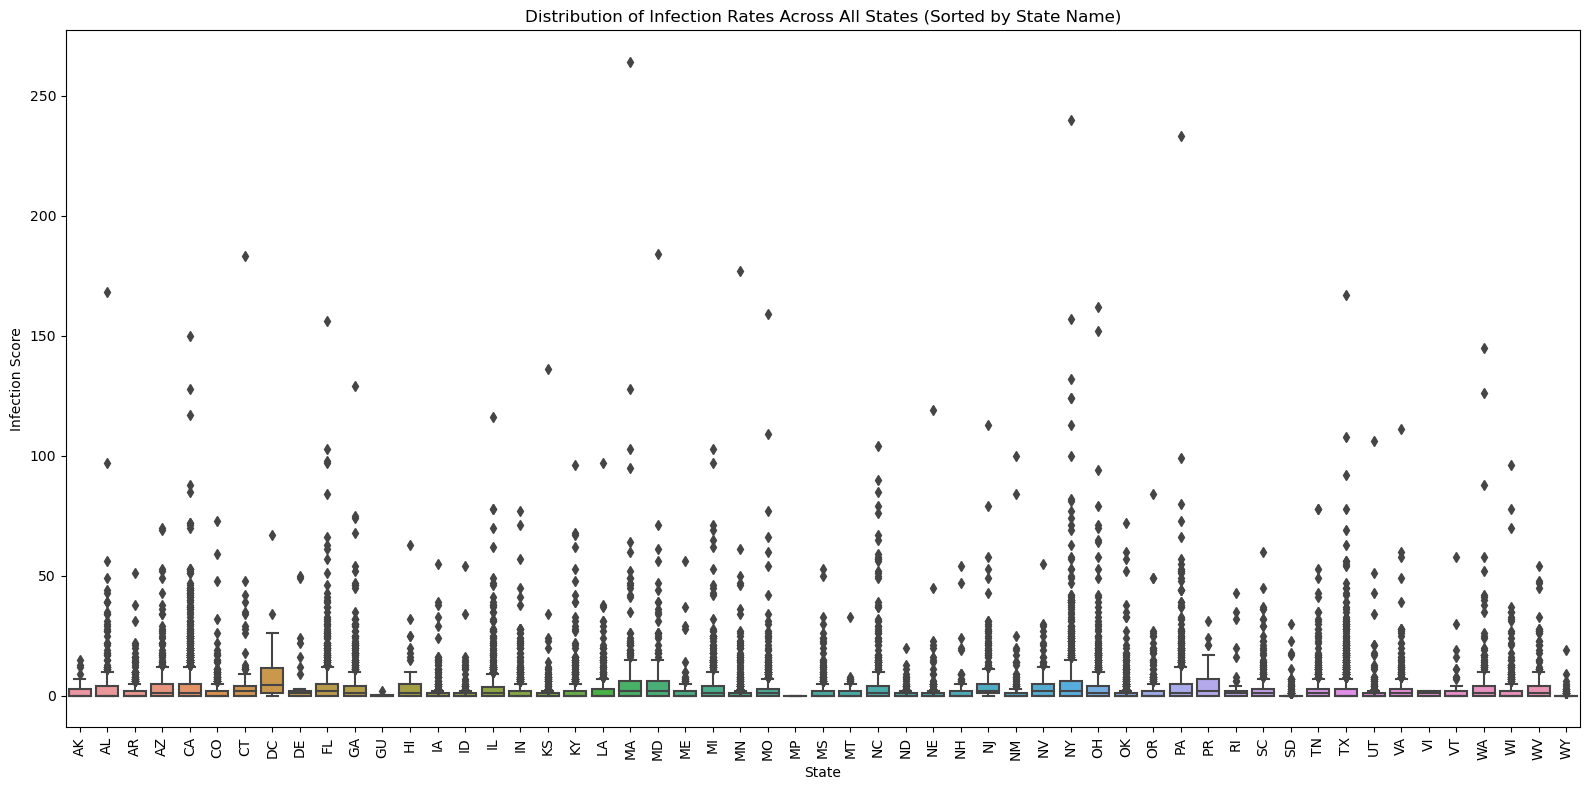

In [25]:
# Sort the DataFrame by state name in ascending order
sorted_df = observed_df.sort_values(by='State')

# Set up the figure size for better readability
plt.figure(figsize=(16, 8))

# Create a box plot for infection scores by state, using the sorted DataFrame
sns.boxplot(data=sorted_df, x='State', y='Score')
plt.title('Distribution of Infection Rates Across All States (Sorted by State Name)')
plt.xlabel('State')
plt.ylabel('Infection Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()



# Correlation Analysis

1. **Prepare the Data:** We need to filter the dataset to include only the infection types you want to analyze, grouped by facilities or states.
2. **Calculate Correlation:** We'll use the Pearson correlation coefficient, which is ideal for continuous variables like infection rates.
3. **Visualize the Correlation:** A heatmap can effectively show the correlation matrix, highlighting any strong positive or negative correlations between infection types.


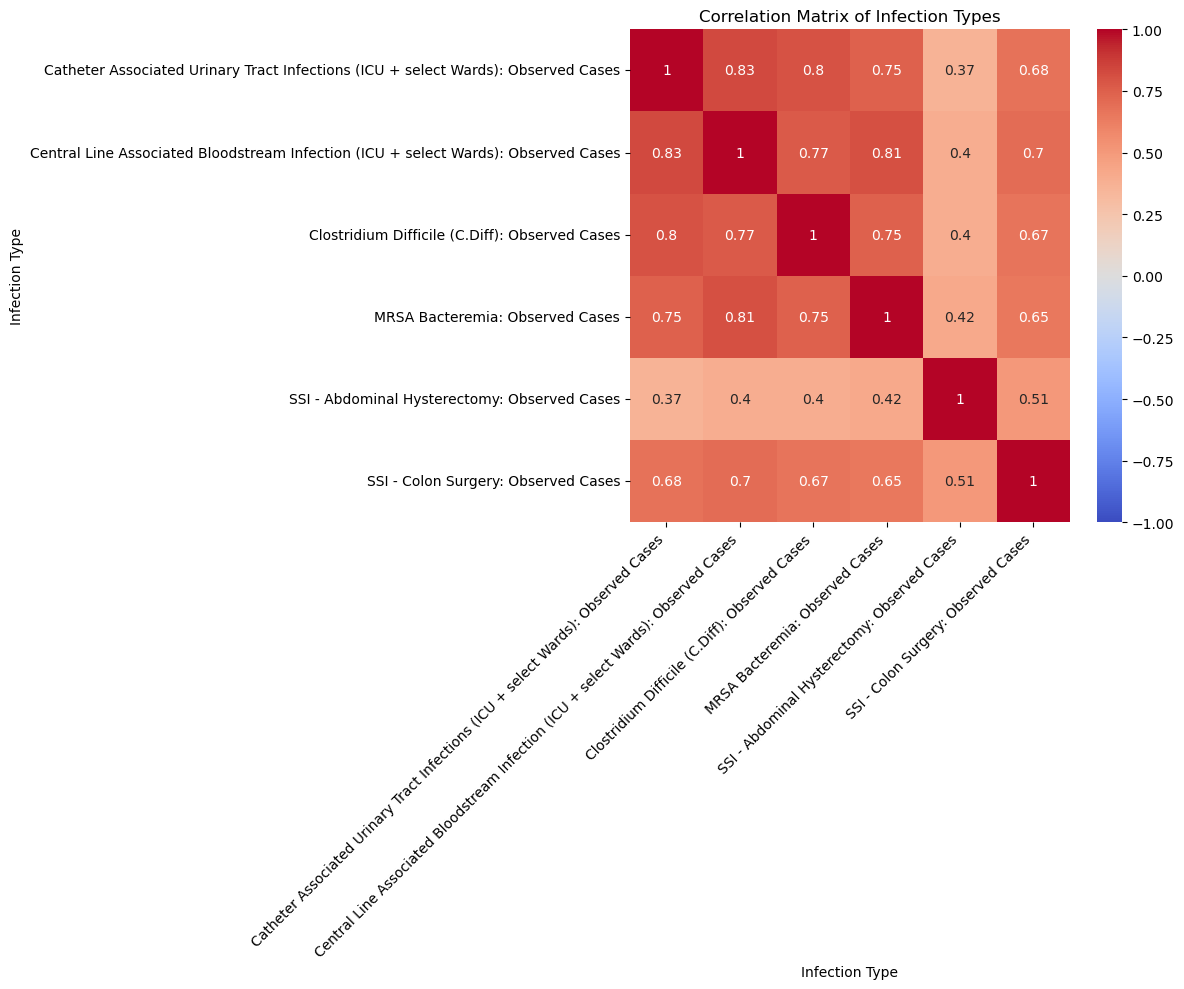

In [26]:
# Filter data to include only relevant infection types (assuming this is already done with observed_df)
# Pivot the data to have infection types as columns and scores as values
correlation_df = observed_df.pivot_table(index='Facility Name', columns='Measure Name', values='Score', aggfunc='mean')

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Infection Types')
plt.xlabel('Infection Type')
plt.ylabel('Infection Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Comparative Analysis

### Steps for Comparative Analysis
1. **Calculate the Mean Infection Rate** for each infection type across all states or facilities.
2. **Create a Bar Plot** to visualize the average infection rates for each infection type, which allows for easy comparison.


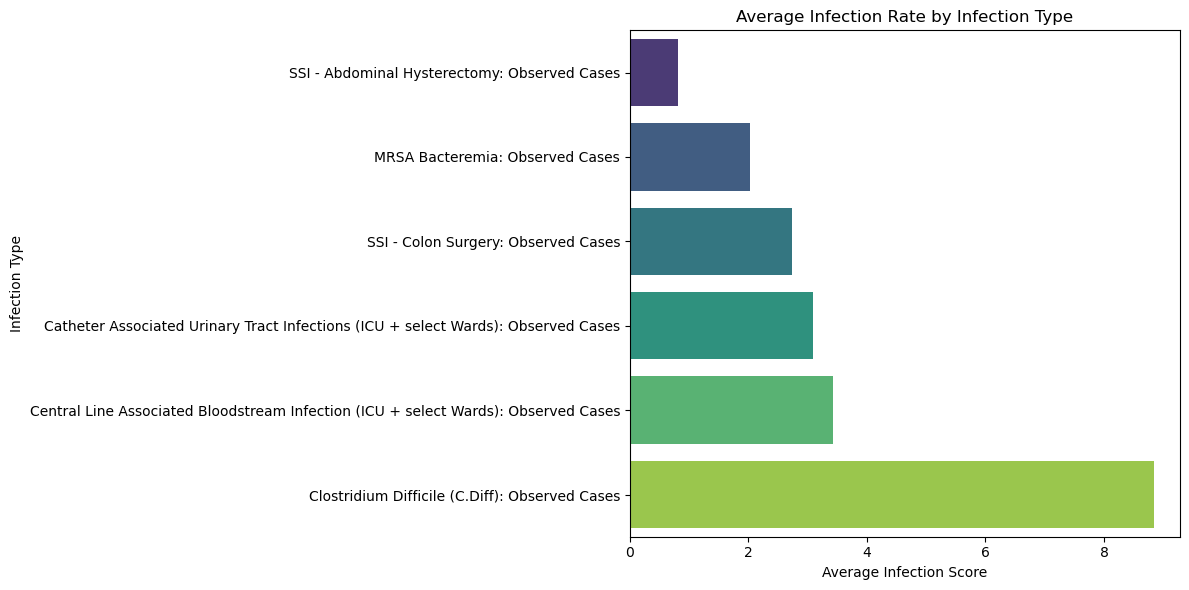

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean infection score for each infection type
infection_type_means = observed_df.groupby('Measure Name')['Score'].mean().sort_values()

# Plot the mean infection rates for each infection type
plt.figure(figsize=(12, 6))
sns.barplot(x=infection_type_means.values, y=infection_type_means.index, palette='viridis')
plt.title('Average Infection Rate by Infection Type')
plt.xlabel('Average Infection Score')
plt.ylabel('Infection Type')
plt.tight_layout()
plt.show()


# Benchmarking Against National Averages

1. **Calculate National Averages:** Since no specific benchmarks are provided, we can calculate an overall average across all states and facilities in the dataset to act as a baseline.
2. **Calculate Differences or Ratios:** For each state or facility, determine how much higher or lower they are compared to the national average.
3. **Visualize the Comparison:** Create a plot to visualize how states or facilities deviate from the national average for each infection type.


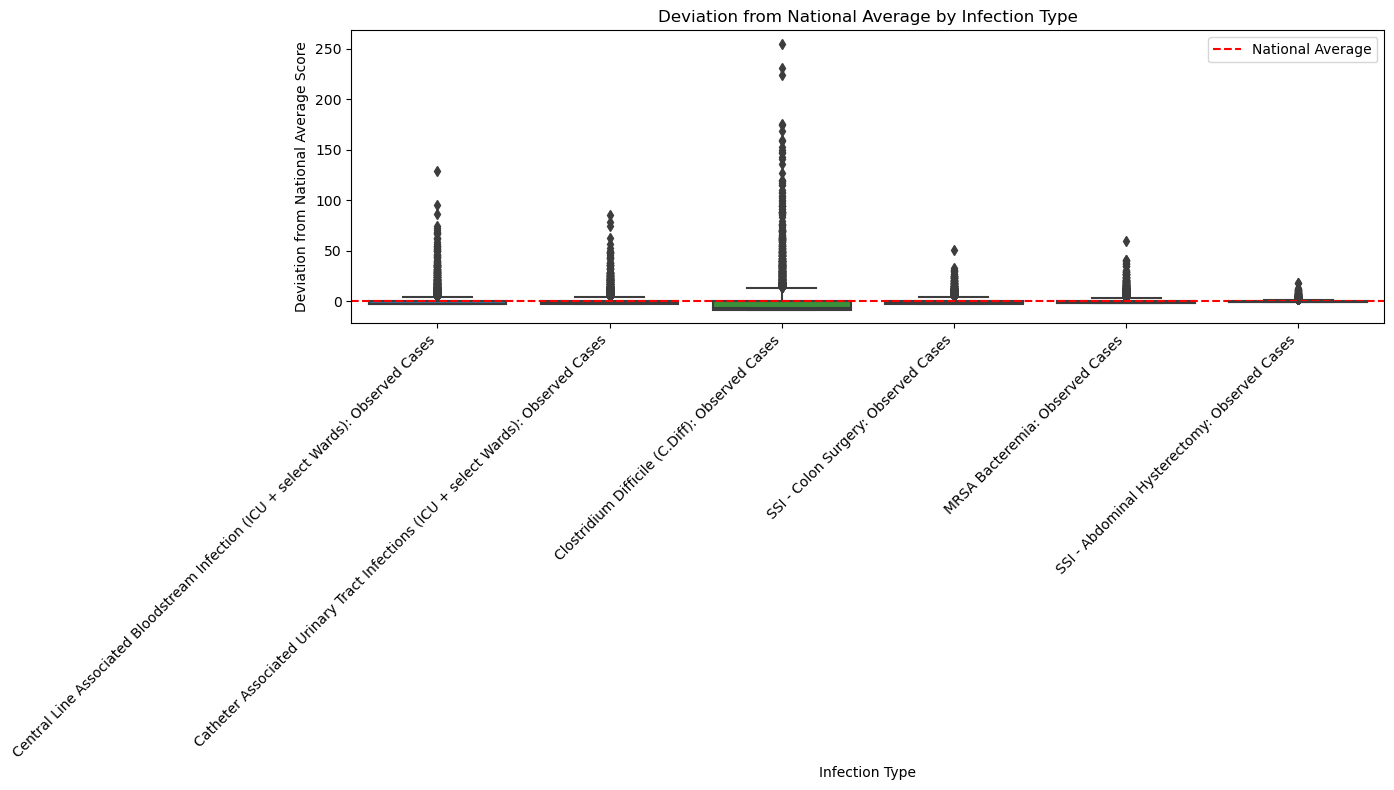

In [28]:
# Calculate the overall national average infection score for each infection type
national_averages = observed_df.groupby('Measure Name')['Score'].mean()

# Merge national averages with observed_df to calculate deviations
benchmark_df = observed_df.copy()
benchmark_df = benchmark_df.merge(national_averages, on='Measure Name', suffixes=('', '_National_Avg'))

# Calculate the deviation from the national average
benchmark_df['Deviation_from_National_Avg'] = benchmark_df['Score'] - benchmark_df['Score_National_Avg']

# Visualize deviations from the national average for each infection type by state
plt.figure(figsize=(14, 8))
sns.boxplot(data=benchmark_df, x='Measure Name', y='Deviation_from_National_Avg')
plt.axhline(0, color='red', linestyle='--', label='National Average')
plt.title('Deviation from National Average by Infection Type')
plt.xlabel('Infection Type')
plt.ylabel('Deviation from National Average Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# K Means Clustering

1. **Prepare the Data:**
- Select the relevant features for clustering, likely the infection scores by infection type.

- Standardize the data to ensure that all variables contribute equally to the distance calculations in clustering.

2. **Choose the Number of Clusters (K):**
- We'll use the Elbow Method to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against different values of K.

3. **Apply K-Means Clustering:**

- Once the optimal K is chosen, apply K-Means clustering and analyze the cluster centers to interpret the groupings.

4. **Visualize the Clusters:**

- Visualize the clusters, possibly using PCA to reduce dimensions, since infection scores across multiple types could result in a high-dimensional space.

#### Elbow Method For Determning Optimal K

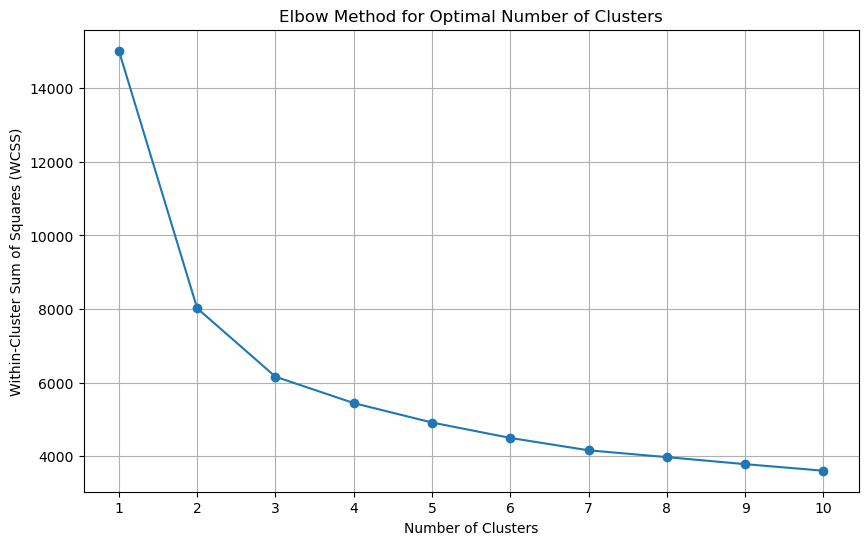

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Filter the data for clustering: Infection scores by infection type
# Pivot the observed_df so that each infection type is a separate column, with facilities as rows
clustering_df = observed_df.pivot_table(index='Facility Name', columns='Measure Name', values='Score', aggfunc='mean')

# Drop rows with NaN values to ensure a complete dataset for clustering
clustering_df = clustering_df.dropna()

# Standardize the data
scaler = StandardScaler()
clustering_df_scaled = scaler.fit_transform(clustering_df)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering_df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


#### Based on above elbow plot, optimal K is 3

Cluster Centers: [[-0.31634824]
 [ 4.56793207]
 [ 1.08299792]]
Facilities per Cluster: Cluster
0    3555
2     521
1     119
Name: count, dtype: int64


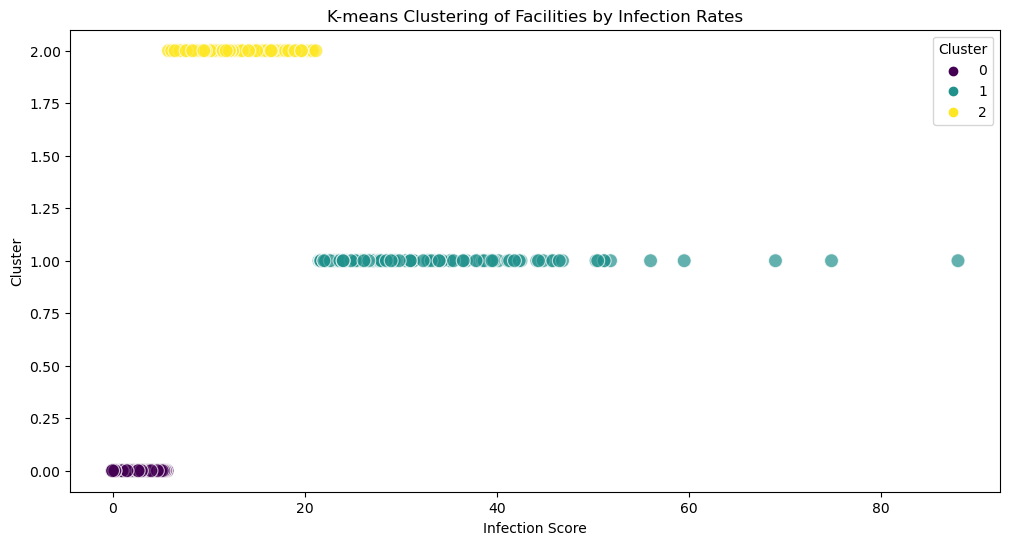

In [30]:
# Select only the facilities with the necessary score data
facility_scores = observed_df.groupby('Facility Name')['Score'].mean().reset_index()

# Standardize the scores for clustering
scaler = StandardScaler()
scores_standardized = scaler.fit_transform(facility_scores[['Score']])

# Apply KMeans with the optimal number of clusters (k=3)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)  # Set n_init to suppress warning
facility_scores['Cluster'] = kmeans.fit_predict(scores_standardized)

# Analyze and plot clusters
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:", cluster_centers)

# Count the number of facilities in each cluster
cluster_counts = facility_scores['Cluster'].value_counts()
print("Facilities per Cluster:", cluster_counts)

# Plot the facilities colored by cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(data=facility_scores, x='Score', y='Cluster', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('K-means Clustering of Facilities by Infection Rates')
plt.xlabel('Infection Score')
plt.ylabel('Cluster')
plt.show()


### Interpretation

The K-means clustering visualization shows how facilities are grouped based on their infection scores. It appears that:

- **Cluster 0 (purple):** Facilities with the lowest infection scores, tightly grouped around zero.
- **Cluster 1 (green):** Facilities with a wider range of infection scores, including mid to higher values, spread more horizontally.
- **Cluster 2 (yellow):** Facilities with relatively low to moderate infection scores, separated from Cluster 0 by slightly higher values.


## State Level Analysis by C.Diff Infection Rates

- DC
- MA
- NY

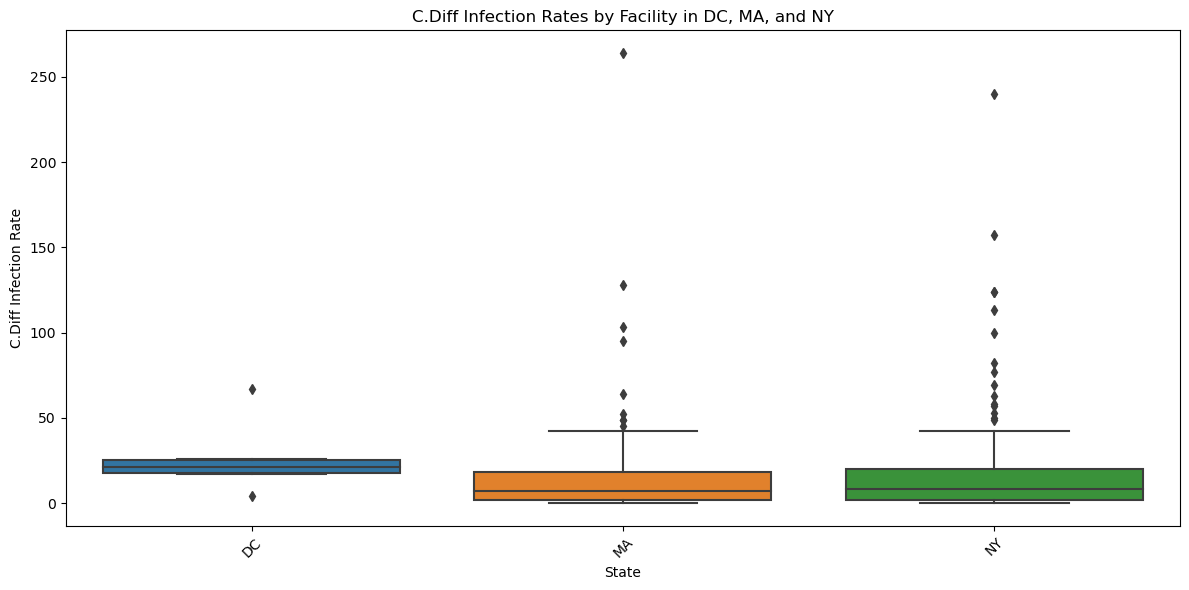

In [31]:
# Filter the dataset for C.Diff observed cases only
cdiff_df = observed_df[observed_df['Measure Name'] == 'Clostridium Difficile (C.Diff): Observed Cases']

# Filter the data for the three states DC, MA, and NY
states_focus = ['DC', 'MA', 'NY']
focused_states_df = cdiff_df[cdiff_df['State'].isin(states_focus)]

# Group the data by State and Facility Name and calculate the mean Score
state_facility_df = focused_states_df.groupby(['State', 'Facility Name'])['Score'].mean().reset_index()

# Plotting the infection rates for facilities in DC, MA, and NY
plt.figure(figsize=(12, 6))
sns.boxplot(data=state_facility_df, x='State', y='Score')
plt.title('C.Diff Infection Rates by Facility in DC, MA, and NY')
plt.xlabel('State')
plt.ylabel('C.Diff Infection Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation

- We can see that each state has some level of "bulk" cases, shown in the boxes of the plots.
- Additionally, we have some VERY extreme outliers in both MA and NY which may be skewing out results.
- Although, there are a great deal of outliers within NY and MA

### Identify Outliers

In [32]:
# filter data for MA and NY
ma_ny_df = observed_df[observed_df['State'].isin(['MA', 'NY']) & (observed_df['Measure Name'] == 'Clostridium Difficile (C.Diff): Observed Cases')]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for C.Diff infection rates in MA and NY
Q1 = ma_ny_df['Score'].quantile(0.25)
Q3 = ma_ny_df['Score'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define the upper bound for outliers (1.5 * IQR above the 75th percentile)
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers (facilities in MA and NY where the Score is greater than the upper bound)
outliers_df = ma_ny_df[ma_ny_df['Score'] > upper_bound]

# Sort the outliers by Score in descending order and display the results
outliers_df_sorted = outliers_df[['Facility Name', 'State', 'Score']].sort_values(by='Score', ascending=False)

# Display the sorted outlier facilities
print("Outlier Facilities in MA and NY for C.Diff Infection Rates (Sorted by Score):")
print(outliers_df_sorted)


Outlier Facilities in MA and NY for C.Diff Infection Rates (Sorted by Score):
                                         Facility Name State  Score
46347                   MASSACHUSETTS GENERAL HOSPITAL    MA  264.0
56509                   NEW YORK-PRESBYTERIAN HOSPITAL    NY  240.0
54059                        MONTEFIORE MEDICAL CENTER    NY  157.0
12160                     BRIGHAM AND WOMEN'S HOSPITAL    MA  128.0
39934                                   KALEIDA HEALTH    NY  124.0
54902                             MOUNT SINAI HOSPITAL    NY  124.0
95384                       WESTCHESTER MEDICAL CENTER    NY  113.0
9891                           BAYSTATE MEDICAL CENTER    MA  103.0
59739                            NYU LANGONE HOSPITALS    NY  100.0
10908             BETH ISRAEL DEACONESS MEDICAL CENTER    MA   95.0
57500                  NORTH SHORE UNIVERSITY HOSPITAL    NY   82.0
43737                LONG ISLAND JEWISH MEDICAL CENTER    NY   77.0
27547                     GARNET HEALT

## Interpretation
- Mass General is the big outliers in MA and New York Presybyterian in Ny. Further investigation is likely needed as there is potentially an outbreak of C.Diff occurring or a large lapse in infection control practices which needs to be adderessed immedietly.
- The average sore of NY and MA hospitals for C.Diff infections is 94.37 which is an exceedingly high rate. Given that the minimum rate for both of these states is in the mid to upper 40's, the max in the mid 200's and the mean for the original score column for all infections is 3.7, the outliers while contributing to the elevated score, are not the direct cause  

In [33]:
outliers_df_sorted['Score'].mean()

94.375

In [34]:
observed_df['Score'].mean()

3.7096968016269183

In [35]:
STOP

NameError: name 'STOP' is not defined

# Predictive Analysis

### Approach
1. Define the Target (High-Risk vs. Low-Risk)
- We will label a facility as "high-risk" if its infection score is above a certain threshold.
- For example, if a facility's infection score exceeds the 75th percentile, we can consider it "high-risk." Otherwise, it's "low-risk."

2. Feature Selection
- We will use the following features for classification:
-     State: Since we found certain states have higher infection rates.
-     Historical Infection Scores: Average infection rates for each facility across infection types.
-     Measure Type: Infection type (C.Diff, MRSA, etc.) as an important feature.

3. Train a Classification Model
- We'll use a classification algorithm like Logistic Regression or Random Forest to train the model to classify the facilities.

4. Evaluate the Model
    - We'll evaluate the performance using metrics such as accuracy, precision, recall, and F1-score.

In [50]:
# Check for nulls
observed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21636 entries, 2 to 97200
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Facility ID           21636 non-null  object        
 1   Facility Name         21636 non-null  object        
 2   Address               21636 non-null  object        
 3   City/Town             21636 non-null  object        
 4   State                 21636 non-null  object        
 5   ZIP Code              21636 non-null  int64         
 6   County/Parish         21636 non-null  object        
 7   Telephone Number      21636 non-null  object        
 8   Measure ID            21636 non-null  object        
 9   Measure Name          21636 non-null  object        
 10  Compared to National  21636 non-null  object        
 11  Score                 21636 non-null  float64       
 12  Footnote              617 non-null    float64       
 13  Start Date           

### Create DF with non NaN values

In [73]:
observed_df = observed_df.drop(['Footnote', 'Start Date', 'End Date', 'Telephone Number', 'ZIP Code', 'Address'], axis = 1)

In [74]:
observed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21636 entries, 2 to 97200
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Facility ID           21636 non-null  object 
 1   Facility Name         21636 non-null  object 
 2   City/Town             21636 non-null  object 
 3   State                 21636 non-null  object 
 4   County/Parish         21636 non-null  object 
 5   Measure ID            21636 non-null  object 
 6   Measure Name          21636 non-null  object 
 7   Compared to National  21636 non-null  object 
 8   Score                 21636 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.7+ MB


### Defining the Target (High Risk vs Low Risk)

In [75]:
# Define threshold for High Risk facilities (75th Percentile of Infection Score)
threshold = observed_df['Score'].quantile(0.75)

# Create column defining threshold for Low Risk facilities (75th Percentile of Infection Score)
observed_df.loc[:,'Risk Level'] = observed_df['Score'].apply(lambda x: 'High-Risk' if x > threshold else 'Low-Risk')

### Feature Selection
We will use 
- State
- Measure Name (Infection Type)
- Infection Score (as a feature for classification)

### Train a Classification Model

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode categorical variables (State and Measure Name)
le_state = LabelEncoder()
le_measure = LabelEncoder()

observed_df.loc[:,'State_Encoded'] = le_state.fit_transform(observed_df['State'])
observed_df.loc[:,'Measure_Encoded'] = le_measure.fit_transform(observed_df['Measure Name'])

# Select features and target
X = observed_df[['State_Encoded', 'Measure_Encoded', 'Score']]
y = observed_df['Risk Level']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   High-Risk       1.00      1.00      1.00      1041
    Low-Risk       1.00      1.00      1.00      3287

    accuracy                           1.00      4328
   macro avg       1.00      1.00      1.00      4328
weighted avg       1.00      1.00      1.00      4328



In [77]:
observed_df.head()

,Facility ID,Facility Name,City/Town,State,County/Parish,Measure ID,Measure Name,Compared to National,Score,Risk Level,State_Encoded,Measure_Encoded
2,05015F,60th Medical Group (Travis AFB),Travis AFB,CA,SOLANO,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,Not Available,0.0,Low-Risk,4,1
5,05015F,60th Medical Group (Travis AFB),Travis AFB,CA,SOLANO,HAI_2_NUMERATOR,Catheter Associated Urinary Tract Infections (...,Not Available,0.0,Low-Risk,4,0
10,05015F,60th Medical Group (Travis AFB),Travis AFB,CA,SOLANO,HAI_6_NUMERATOR,Clostridium Difficile (C.Diff): Observed Cases,Worse than the National Benchmark,6.0,High-Risk,4,2
14,02013F,673rd Medical Group (Joint Base Elmendorf-Rich...,JBER,AK,ANCHORAGE,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,Not Available,0.0,Low-Risk,0,1
17,02013F,673rd Medical Group (Joint Base Elmendorf-Rich...,JBER,AK,ANCHORAGE,HAI_2_NUMERATOR,Catheter Associated Urinary Tract Infections (...,Not Available,0.0,Low-Risk,0,0


In [78]:
observed_df.shape




## Need to figure out what is skewing the results and giving it perfect results

(21636, 12)